# Uppgift 2 - KPIer & EDA

Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på en eller flera
dataset som ni får söka själva. Ni får inte ta dataseten som ni redan jobbat med i uppgift 0 och 1. Excel och eller csv-filer
kan ni hitta i skolverkets statistik
Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du
använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla
visualiseringar.

### KPIs - Kostnad per inskrivet barn/elev + Totalts - Förskola, Grundskolan, Specialskola, Grundsärskola, Anpassad Gymnasieskola, Gymnasieskola

file handling

In [231]:
# read the file
import pandas as pd

file_path = "Kostnader_2022_Riket.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1', skiprows=7)
df


,Verksamhet,Totalkostnad,Undervisning,Lokaler och inventarier,Skolmåltider,Lärverktyg/ utrustning/ skolbibliotek,Elevhälsa,Övrigt,Skolskjutsar och reseersättning,Noter totalkostnader,Noter lokalkostnader
0,Fritidshem och annan pedagogisk verksamhet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Totalt, tkr",22987642.0,.,.,.,.,.,.,.,NaN,NaN
2,Pedagogisk omsorg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Totalt, tkr",1018481.0,.,.,.,.,.,.,.,NaN,NaN
4,"Kostnad per inskrivet barn, kr",130900.0,.,.,.,.,.,.,.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
61,2022. Dessutom ingår de 3 896 tkr som avser ne...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,per elev ingår inte kostnaden för nystartade/n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,för döva och hörselskadade i Örebro 89 186 tkr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,10) I totalkostnaden och total kostnad per ele...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
# filtering data frame using index for desirable rows and columns
selected_data = df[(df.index >= 14) & (df.index <= 34)][['Verksamhet', 'Totalkostnad']]
selected_data.reset_index(drop=True, inplace=True)
selected_data

,Verksamhet,Totalkostnad
0,Förskola,NaN
1,"Totalt, tkr",86536471.0
2,"Kostnad per inskrivet barn, kr",169500.0
3,Förskoleklass,NaN
4,"Totalt, tkr",8780035.0
5,"Kostnad per elev, kr",63400.0
6,Grundskolan,NaN
7,"Totalt, tkr",143016046.0
8,"Kostnad per elev, kr",128900.0
9,Specialskola,NaN


In [233]:
# set index
selected_data.set_index(selected_data.columns[0], inplace=True)
selected_data


,Totalkostnad
Verksamhet,
Förskola,NaN
"Totalt, tkr",86536471.0
"Kostnad per inskrivet barn, kr",169500.0
Förskoleklass,NaN
"Totalt, tkr",8780035.0
"Kostnad per elev, kr",63400.0
Grundskolan,NaN
"Totalt, tkr",143016046.0
"Kostnad per elev, kr",128900.0


In [234]:
# rename rows
selected_data.index = selected_data.index.str.strip()
selected_data.rename(index={'Kostnad per inskrivet barn, kr': 'Kostnad per Elev', 'Kostnad per elev, kr': 'Kostnad per Elev'}, inplace=True)
selected_data

,Totalkostnad
Verksamhet,
Förskola,NaN
"Totalt, tkr",86536471.0
Kostnad per Elev,169500.0
Förskoleklass,NaN
"Totalt, tkr",8780035.0
Kostnad per Elev,63400.0
Grundskolan,NaN
"Totalt, tkr",143016046.0
Kostnad per Elev,128900.0


In [235]:
# Define new indexes
new_indexes = ['Förskola', 'Förskoleklass', 'Grundskolan', 'Specialskola', 'Grundsärskola', 'Anpassad Gymnasieskola', 'Gymnasieskolan']

# Find the positions of the 'Totalt, tkr' indexes
totalt_positions = [i for i, idx in enumerate(selected_data.index) if idx == 'Totalt, tkr']

# Iterate over the range of the length of new_indexes
for i, idx in zip(totalt_positions, new_indexes):
    selected_data.index.values[i] = idx

selected_data
# 

,Totalkostnad
Verksamhet,
Förskola,NaN
Förskola,86536471.0
Kostnad per Elev,169500.0
Förskoleklass,NaN
Förskoleklass,8780035.0
Kostnad per Elev,63400.0
Grundskolan,NaN
Grundskolan,143016046.0
Kostnad per Elev,128900.0


In [236]:
# drop rows with NaN values

selected_data = selected_data.dropna()

selected_data

,Totalkostnad
Verksamhet,
Förskola,86536471.0
Kostnad per Elev,169500.0
Förskoleklass,8780035.0
Kostnad per Elev,63400.0
Grundskolan,143016046.0
Kostnad per Elev,128900.0
Specialskola,699693.0
Kostnad per Elev,909200.0
Grundsärskola,7238691.0


In [237]:
# Reset the index
selected_data.reset_index(inplace=True)

# Create a new column "Kostnad per Elev" and fill it with the values where 'Totalkostnad' is not null
selected_data['Kostnad per Elev'] = selected_data[selected_data['Totalkostnad'].notnull()]['Totalkostnad']

selected_data.head()

C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\3362698685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Kostnad per Elev'] = selected_data[selected_data['Totalkostnad'].notnull()]['Totalkostnad']


,Verksamhet,Totalkostnad,Kostnad per Elev
0,Förskola,86536471.0,86536471.0
1,Kostnad per Elev,169500.0,169500.0
2,Förskoleklass,8780035.0,8780035.0
3,Kostnad per Elev,63400.0,63400.0
4,Grundskolan,143016046.0,143016046.0


In [238]:
# Shift the values of the 'Totalkostnad' column downwards by 1 row
selected_data['Kostnad per Elev'] = selected_data['Totalkostnad'].shift(-1)

selected_data

C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\334379042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Kostnad per Elev'] = selected_data['Totalkostnad'].shift(-1)


,Verksamhet,Totalkostnad,Kostnad per Elev
0,Förskola,86536471.0,169500.0
1,Kostnad per Elev,169500.0,8780035.0
2,Förskoleklass,8780035.0,63400.0
3,Kostnad per Elev,63400.0,143016046.0
4,Grundskolan,143016046.0,128900.0
5,Kostnad per Elev,128900.0,699693.0
6,Specialskola,699693.0,909200.0
7,Kostnad per Elev,909200.0,7238691.0
8,Grundsärskola,7238691.0,546200.0
9,Kostnad per Elev,546200.0,3509659.0


In [239]:
# Filter out rows with value "Kostnad per Elev" in the column "Totalkostnad"
cleaned_df = selected_data[selected_data['Verksamhet'] != 'Kostnad per Elev']

# Reset the index
cleaned_df.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
cleaned_df

,Verksamhet,Totalkostnad,Kostnad per Elev
0,Förskola,86536471.0,169500.0
1,Förskoleklass,8780035.0,63400.0
2,Grundskolan,143016046.0,128900.0
3,Specialskola,699693.0,909200.0
4,Grundsärskola,7238691.0,546200.0
5,Anpassad Gymnasieskola,3509659.0,512100.0
6,Gymnasieskolan,48868231.0,135100.0


In [240]:
cleaned_df['Totalkostnad'] = cleaned_df['Totalkostnad'].astype(int)
cleaned_df['Kostnad per Elev'] = cleaned_df['Kostnad per Elev'].astype(int)

# Rename column
cleaned_df.rename(columns={'Totalkostnad': 'Total Kostnad'}, inplace=True)

cleaned_df

C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\2476159409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Totalkostnad'] = cleaned_df['Totalkostnad'].astype(int)
C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\2476159409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Kostnad per Elev'] = cleaned_df['Kostnad per Elev'].astype(int)
C:\Users\arthu\AppData\Local\Temp\ipykernel_15892\2476159409.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Verksamhet,Total Kostnad,Kostnad per Elev
0,Förskola,86536471,169500
1,Förskoleklass,8780035,63400
2,Grundskolan,143016046,128900
3,Specialskola,699693,909200
4,Grundsärskola,7238691,546200
5,Anpassad Gymnasieskola,3509659,512100
6,Gymnasieskolan,48868231,135100


In [241]:
#school_cost = cleaned_df.groupby("Verksamhet")[["Total Kostnad", "Kostnad per Elev"]].max()
school_cost = cleaned_df.set_index(cleaned_df.columns[0])
school_cost

,Total Kostnad,Kostnad per Elev
Verksamhet,,
Förskola,86536471,169500
Förskoleklass,8780035,63400
Grundskolan,143016046,128900
Specialskola,699693,909200
Grundsärskola,7238691,546200
Anpassad Gymnasieskola,3509659,512100
Gymnasieskolan,48868231,135100


## drawing the graph

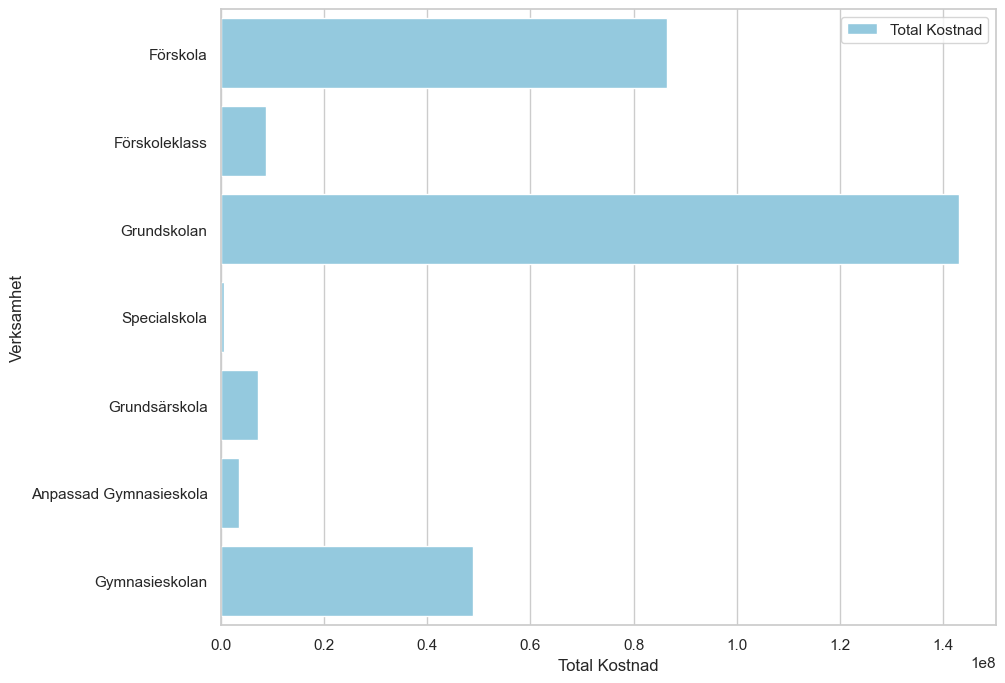

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.barplot(x='Total Kostnad', 
            y=school_cost.index, 
            data=school_cost, 
            color='skyblue', 
            label='Total Kostnad')
plt.show()


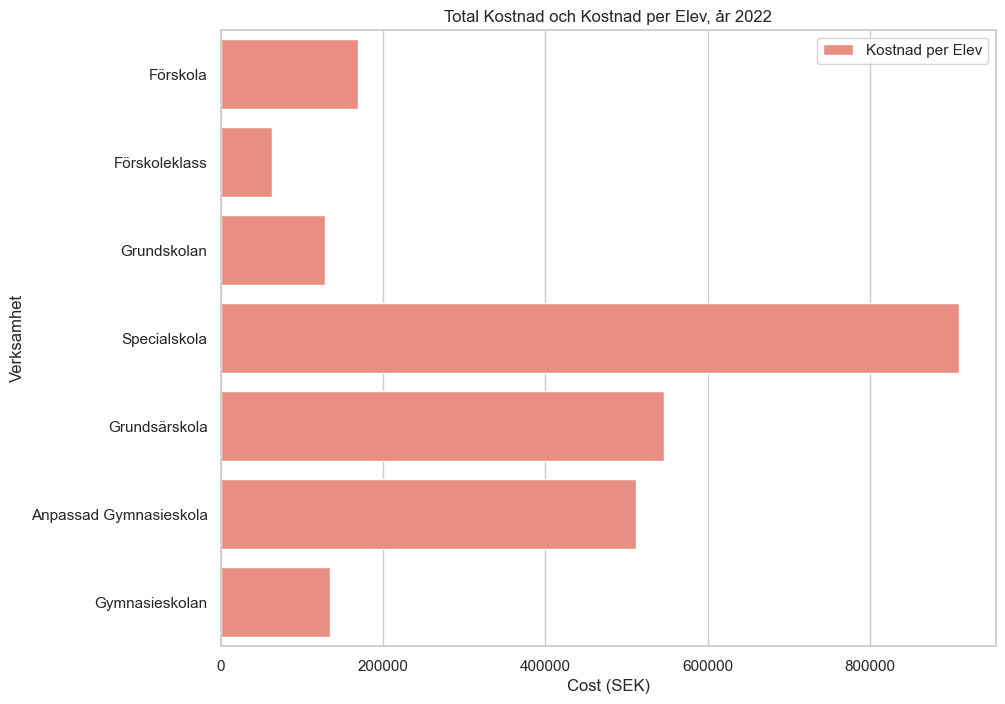

In [255]:
plt.figure(figsize=(10, 8))

sns.barplot(x='Kostnad per Elev', 
            y=school_cost.index, 
            data=school_cost, 
            color='salmon', 
            label='Kostnad per Elev')

# Add labels and title
plt.xlabel('Cost (SEK)')
plt.ylabel('Verksamhet')
plt.title('Total Kostnad och Kostnad per Elev, år 2022')

plt.show()

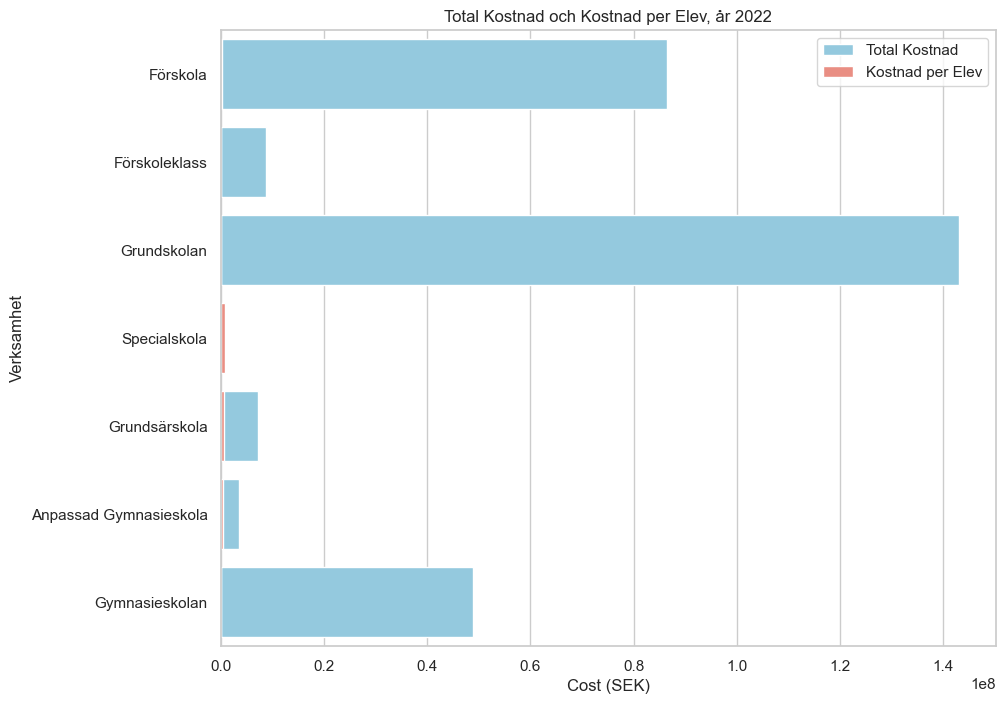

In [257]:
# Combining both charts 

plt.figure(figsize=(10, 8))

sns.barplot(x='Total Kostnad', 
            y=school_cost.index, 
            data=school_cost, 
            color='skyblue', 
            label='Total Kostnad')

sns.barplot(x='Kostnad per Elev', 
            y=school_cost.index, 
            data=school_cost, 
            color='salmon', 
            label='Kostnad per Elev')

plt.xlabel('Cost (SEK)')
plt.ylabel('Verksamhet')
plt.title('Total Kostnad och Kostnad per Elev, år 2022')

plt.show()

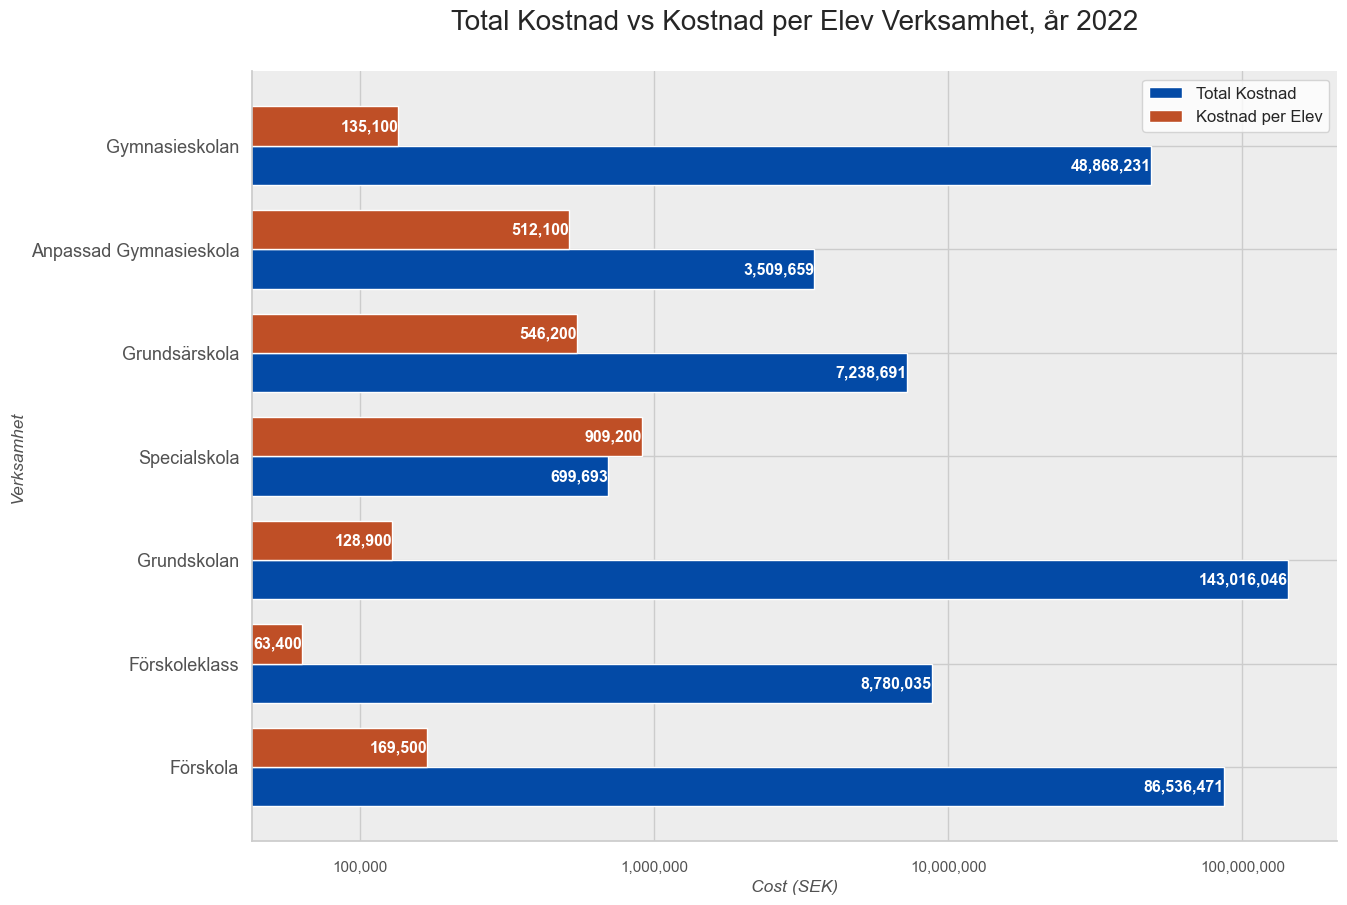

In [408]:
# add logarithmic scale for the x-axis to emphasize visiual differences

from matplotlib.ticker import ScalarFormatter, FuncFormatter
import numpy as np

grey = '#525252'


plt.figure(figsize=(14, 10))
barWidth = 0.38
r1 = np.arange(len(school_cost.index))
r2 = [x + barWidth for x in r1]


bars1 = plt.barh(r1, school_cost['Total Kostnad'], color='#034AA6', height=barWidth, label='Total Kostnad')
bars2 = plt.barh(r2, school_cost['Kostnad per Elev'], color='#BF4F26', height=barWidth, label='Kostnad per Elev')

# add value markers to every bar using a for loop for both barh
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, '{:,.0f}'.format(width),
                 va='center', ha='right', fontsize=11.5, weight='bold', color='white')

plt.legend(fontsize=12)

# Add labels and title
plt.xlabel('Cost (SEK)', fontstyle='italic', fontsize=12.5, color=grey)
plt.ylabel('Verksamhet', fontstyle='italic', fontsize=12.5, color=grey)
plt.title('Total Kostnad vs Kostnad per Elev Verksamhet, år 2022', fontsize=20, pad=30, loc='center')

plt.xscale('log')

# Custom tick formatter to display actual amounts without scientific notation
def amount_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Apply custom formatter to x-axis
formatter = FuncFormatter(amount_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Change color of x-axis numbers to grey
plt.gca().tick_params(axis='x', colors=grey, size=10)

# Add yticks on the middle of the group bars
plt.yticks([r + barWidth/2 for r in range(len(school_cost.index))], school_cost.index, color=grey, fontsize=13)

plt.gca().set_facecolor('#EDEDED')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('visualiseringar/total_vs_elev.png', bbox_inches='tight', transparent=True, pad_inches=0, facecolor=(1, 1, 1))
plt.show()